In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [14]:
A = yf.download("ATOM-USD", start = "2020-03-01", end="2022-03-01")


[*********************100%***********************]  1 of 1 completed


In [17]:
A.head( ) # Top 5 rows


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-01,3.471435,3.547793,3.280848,3.368275,3.368275,134716473
2020-03-02,3.362772,3.757048,3.339584,3.684762,3.684762,155975816
2020-03-03,3.685558,3.691775,3.525578,3.629734,3.629734,127505754
2020-03-04,3.628236,3.885784,3.628236,3.742063,3.742063,155036912
2020-03-05,3.743643,3.934144,3.743230,3.760673,3.760673,144313784


In [18]:

adj_close =  A['Adj Close'] #Take only Adj Close 
close = A['Close']


In [19]:
A.tail( ) # Last 5 rows


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,25.281250,25.482721,21.750307,24.945091,24.945091,1378414997
2022-02-25,24.936354,27.400043,24.350094,27.225927,27.225927,898558382
2022-02-26,27.232702,30.286327,27.206915,29.807392,29.807392,1069523684
2022-02-27,29.803743,29.878223,26.482882,26.751556,26.751556,966987913
2022-02-28,26.743927,31.621391,26.467180,31.426020,31.426020,1391691707


 #  Movement of Cosmos Atom-USD price (Adj Close) over 2 years


array([<AxesSubplot:xlabel='Date'>], dtype=object)

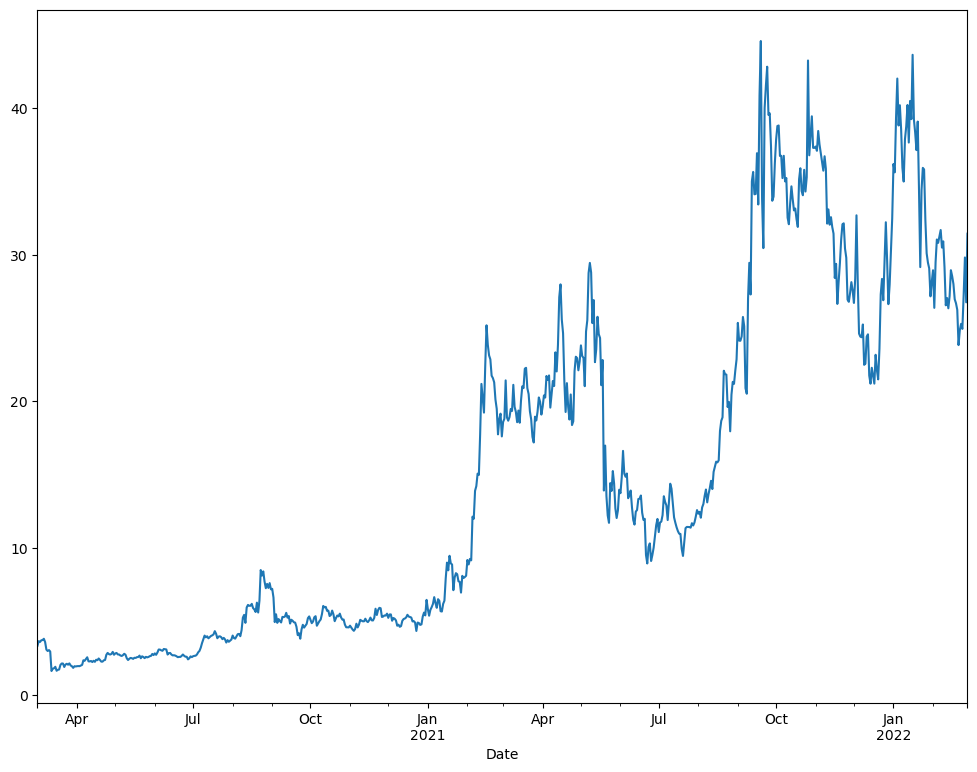

In [24]:
adj_close.plot(figsize=(12, 9), subplots=True)       #Plotting the Adj CLose Column of the data


In [25]:

cos_data = pd.DataFrame(adj_close.dropna()) #Put adj close in the data frame after removing null data
cos_data.tail() # Read last 5 rows of adj_close data

,Adj Close
Date,
2022-02-24,24.945091
2022-02-25,27.225927
2022-02-26,29.807392
2022-02-27,26.751556
2022-02-28,31.426020


#   Maximum Price Of Cosmos during this 2 year period.



In [26]:
cos_data[cos_data['Adj Close'] == cos_data['Adj Close'].max()]


,Adj Close
Date,
2021-09-19,44.542789


In [27]:
cos_data.describe().round(2) # Descriptive Statistics for Adjacent close price 


,Adj Close
count,730.00
mean,14.87
std,11.80
min,1.65
25%,4.79
50%,11.67
75%,23.87
max,44.54


# Rolling Statistics


In [28]:
A['SMA1'] = A['Adj Close'].rolling(window=20).mean()
A['SMA2'] = A['Adj Close'].rolling(window=60).mean()
A[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-02-24,24.945091,27.782844,32.286779
2022-02-25,27.225927,27.604192,32.246626
2022-02-26,29.807392,27.532008,32.299632
2022-02-27,26.751556,27.285868,32.279415
2022-02-28,31.426020,27.333146,32.298906


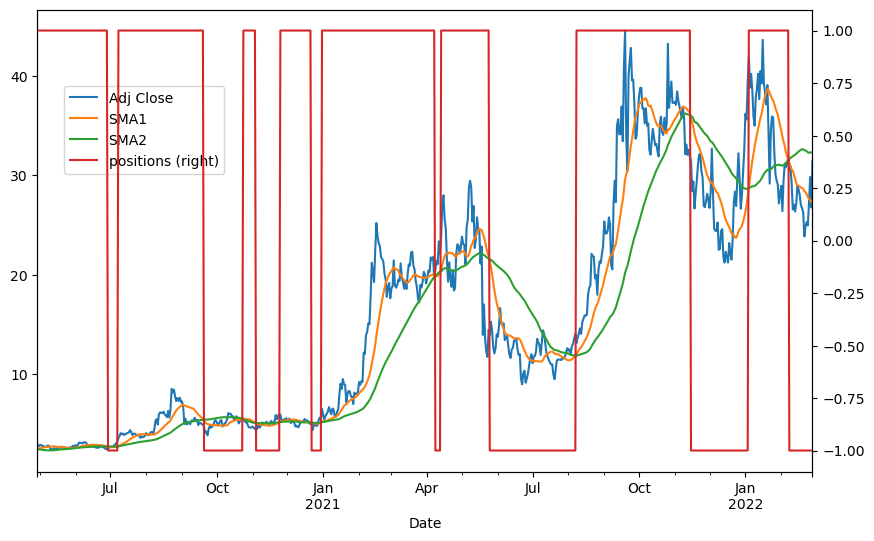

In [29]:
A.dropna(inplace=True)
A['positions'] = np.where(A['SMA1'] > A['SMA2'],1,-1)
ax = A[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Calculation of Annualised Returns and Annualised Volatility

In [31]:
cos_adj_close = pd.DataFrame(adj_close.dropna())


# normal daily return

In [32]:
normal_return = cos_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2020-03-01,NaN
2020-03-02,0.093961
2020-03-03,-0.014934
2020-03-04,0.030947
2020-03-05,0.004973


# Annualised normal return

In [33]:
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 2.16603611 and its annualized volatility is 1.43860268


# Daily and annualised log return & volatility

In [35]:
log_return = np.log(cos_adj_close / cos_adj_close.shift(1))
log_return.head().round(4)


,Adj Close
Date,
2020-03-01,NaN
2020-03-02,0.0898
2020-03-03,-0.0150
2020-03-04,0.0305
2020-03-05,0.0050


In [37]:
dflr = pd.DataFrame(log_return, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is 2.23629890 and its annualized volatility is 2.06026644 


# Daily log return

In [47]:

log_return = np.log(cos_adj_close / cos_adj_close.shift(1))
log_return.head().round(4)

,Adj Close
Date,
2020-03-01,NaN
2020-03-02,0.0898
2020-03-03,-0.0150
2020-03-04,0.0305
2020-03-05,0.0050


#  3 months Time period Return and volatility

In [39]:
log_return_last_3months=log_return[-90:]
log_return_last_3months


,Adj Close
Date,
2021-12-01,-0.030973
2021-12-02,0.060495
2021-12-03,0.141116
2021-12-04,-0.149936
2021-12-05,-0.132919
...,...
2022-02-24,-0.013631
2022-02-25,0.087493
2022-02-26,0.090587


In [40]:
dflr1 = pd.DataFrame(log_return_last_3months, columns = ['Adj Close']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The annualized log return (for the last 3 months) is %.8f and its annualized volatility is %.8f' % (lr1,lv1))

The annualized log return (for the last 3 months) is 1.06779660 and its annualized volatility is 2.00544718


# Mid year (3 months ) Return and Volatility

In [41]:
log_return_mid_year=log_return[150:-90]
log_return_mid_year

,Adj Close
Date,
2020-07-29,-0.029773
2020-07-30,0.021466
2020-07-31,0.019420
2020-08-01,0.069062
2020-08-02,-0.043182
...,...
2021-11-26,-0.100699
2021-11-27,-0.005481
2021-11-28,0.022833


In [42]:
dflr2 = pd.DataFrame(log_return_mid_year, columns = ['Adj Close']) 
lr2 = dflr2.mean() * len(dflr)
lv2 = dflr2.std() * (len(dflr) ** 0.5)
print('The mid year annualized  log return (for Aug21 - Dec21) is %.8f and its annualized volatility is %.8f' % (lr2,lv2))


The mid year annualized  log return (for Aug21 - Dec21) is 2.97081966 and its annualized volatility is 2.13164574


# Average Anualized volatility for different intervals over the time period


In [43]:
all_lv=lv,lv2,lv1
all_lv1 = pd.DataFrame (all_lv)


In [44]:
lv_avg=all_lv1 ['Adj Close'].mean()
print ('The combine Annualized Log volatility =', lv_avg)


The combine Annualized Log volatility = 2.0657864521138465


In [48]:
all_lr = lr,lr2,lr1
all_lr1 = pd.DataFrame (all_lr)



In [49]:
lr_avg=all_lr1 ['Adj Close'].mean()
print ('The combine Annualized Log Return =', lr_avg)


The combine Annualized Log Return = 2.091638385409289


#  Data Input

In [50]:
s0 = 31.42              # spot price taken from last adjusted closing price mar 2022
K = 29              # strike price below  spot price as it is put option
T = 1/4                # maturity ( 3 months so 3/12)
r = 0.035             # risk free rate taken from  US bond rate
vol = 2.065              # average annualised volatility of underlying asset caluclated over different intervals
N = 4                   # number of periods or number of time steps  
payoff = "put"          # type of option 

# European put option pricing using 2 different  pricing model
1) Binomial Tree
2) Monte Carlo



# 1. BINOMIAL TREE (CRR)

In [52]:
dT = float(T) / N                             # Delta t
u = np.exp(vol * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))


Crypto Price movement UP factor 1.6757318579998304 and DOWN factor 0.5967541854778661 


In [56]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = s0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1


In [57]:
S

array([[ 31.42      ,  52.65149498,  88.22978751, 147.84946575,
        247.75605994],
       [  0.        ,  18.75001651,  31.42      ,  52.65149498,
         88.22978751],
       [  0.        ,   0.        ,  11.18915083,  18.75001651,
         31.42      ],
       [  0.        ,   0.        ,   0.        ,   6.67717259,
         11.18915083],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          3.98463069]])

In [59]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [60]:

print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)


Probalilty for moving  up :  0.3757591275249937
Probalilty for moving  down :  0.6242408724750064


# Step 2: Finding option value at each final node


In [61]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 17.81084917],
       [ 0.        ,  0.        ,  0.        ,  0.        , 25.01536931]])

# Step 3: Find option value at earlier nodes
 European Option
 


In [62]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[10.22065381,  4.30418739,  0.        ,  0.        ,  0.        ],
       [ 0.        , 13.8179005 ,  6.9101741 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 18.02445138, 11.09396541,  0.        ],
       [ 0.        ,  0.        ,  0.        , 22.25945925, 17.81084917],
       [ 0.        ,  0.        ,  0.        ,  0.        , 25.01536931]])

In [63]:

print('European ' + payoff, str( V[0,0]))

European put 10.220653814228067


 # 2. Monte Carlo simulation
 It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.



In [76]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S


In [67]:
T = 1/4
r = 0.035
sigma = 2.065
S0 = 31.42
K =29

In [77]:
S = mcs_simulation_np(1000)


In [69]:
S = np.transpose(S)
S

array([[ 31.42      ,  27.80586512,  23.71728362, ...,  34.32337692,
         34.46854829,  36.90990738],
       [ 31.42      ,  28.22976217,  28.7552599 , ...,  27.6070604 ,
         24.13768767,  22.61975339],
       [ 31.42      ,  30.5486858 ,  37.32075696, ...,  19.31536284,
         20.58546333,  19.49076901],
       ...,
       [ 31.42      ,  29.85029949,  34.83031229, ...,  36.599419  ,
         29.95373003,  26.75271348],
       [ 31.42      ,  31.41381078,  29.11408501, ..., 104.9756739 ,
        109.26236896, 112.90794563],
       [ 31.42      ,  33.61286661,  32.11882521, ...,   7.31779599,
          7.99818673,   9.82491094]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

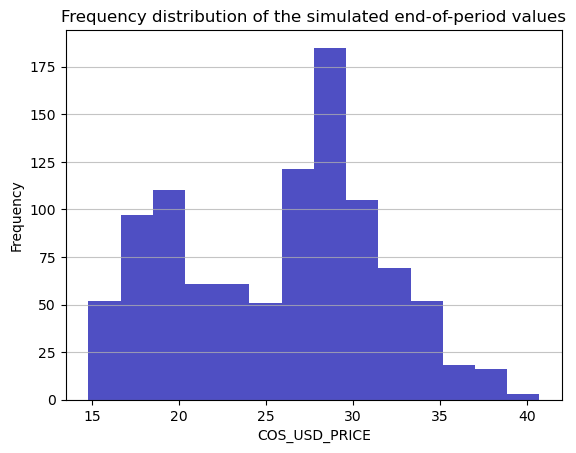

In [79]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=5)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('COS_USD_PRICE')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')



In [80]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 4.1920997767955335


# Greeks

# Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.



In [131]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta


In [148]:
d = delta(31.42, 29, 1/4, 0.035, 0, 2.065, 'put')
print('The value of Delta is', d.round(4),'.','If the cypto atom price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.2735 . If the cypto atom price increase 1 dollar, then the value of the option will increase $ -0.2735 .


In [137]:
S = np.linspace(20,150,51)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 31.42, 1/4, 0.035, 0, 2.065, 'put')

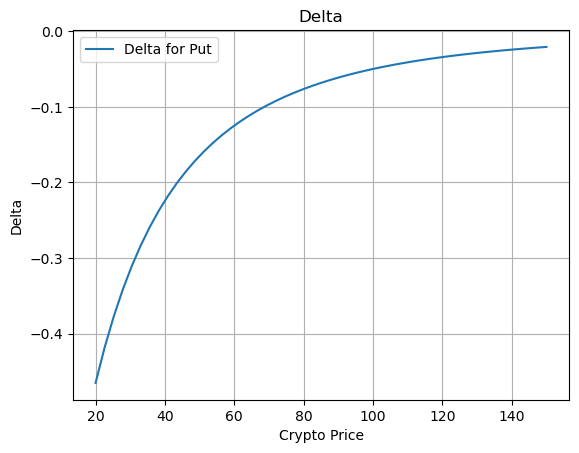

In [140]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [143]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 31.42, T[i], 0.035, 0,2.065, 'put')

C:\Users\91982\AppData\Local\Temp\ipykernel_4208\2588004393.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


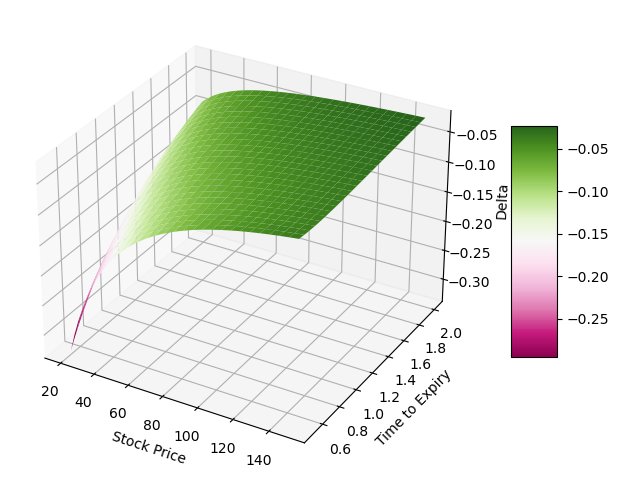

In [144]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.PiYG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.



In [139]:

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [141]:
gamma(31.42, 29, 1/4, 0.035, 0, 2.065, 'put')


0.010257159846330478

In [149]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

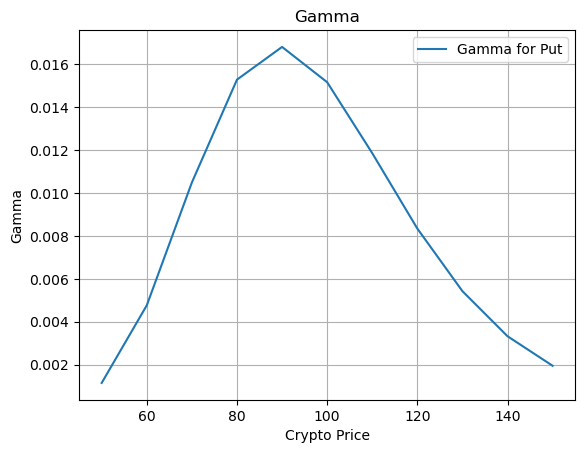

In [151]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [191]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 29, T[i], 0.035, 0, 2.065, 'put')



C:\Users\91982\AppData\Local\Temp\ipykernel_4208\397541920.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


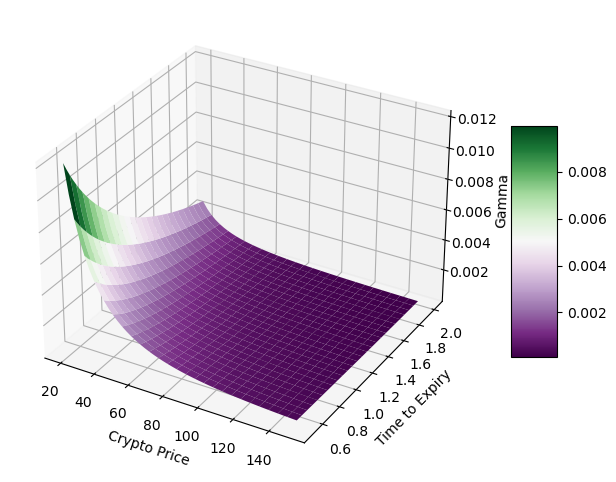

In [192]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.PRGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.



In [154]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [156]:
s = speed(31.42,29,1/4, 0.035,0, 2.065, "put")

print('The value of Speed is', s.round(4),'.','If the Crypto Cosmos atom price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by', abs(s).round(4))




The value of Speed is -0.0003 . If the Crypto Cosmos atom price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by 0.0003


In [157]:
S = np.linspace(20,200,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],29,1/4,0.035,0, 2.065, "put")



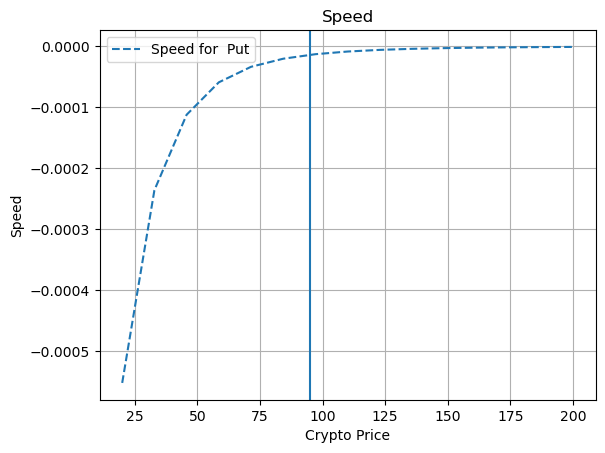

In [158]:
fig = plt.figure()
plt.plot(S, Speed, '--')
plt.grid()
plt.axvline(95.10)
plt.xlabel('Crypto Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for  Put'])

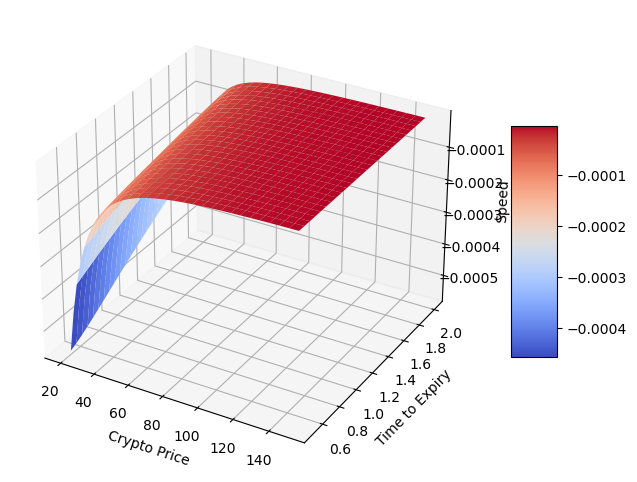

In [162]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".



In [193]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [194]:
theta(31.42, 29, 1/4, 0.035, 0, 2.065, 'put')


20.91928858065124

In [197]:
T = np.linspace(0.25,7,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(31.42, 29, T[i], 0.035, 0, 2.065, 'put')

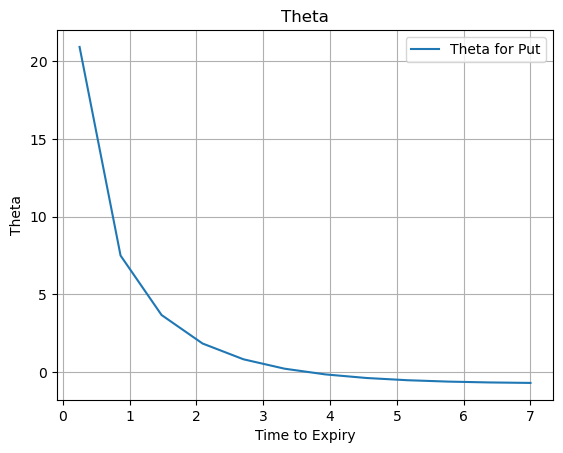

In [198]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [209]:
S = np.linspace(70, 100, 20)
T = np.linspace(0.01, 0.04, 20)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],29, T[i],0.035, 0,2.065, 'put')

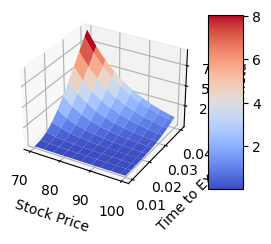

In [210]:

fig = plt.figure(figsize=(3, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);






# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).



In [212]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho



In [213]:
rho(31.42, 29, 1/4, 0.035, 0, 2.065, 'put')

-4.789716007303629

In [214]:
r = np.linspace(0,0.8,51)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(31.42, 29, 1/4, r[i], 0, 2.065, 'put')

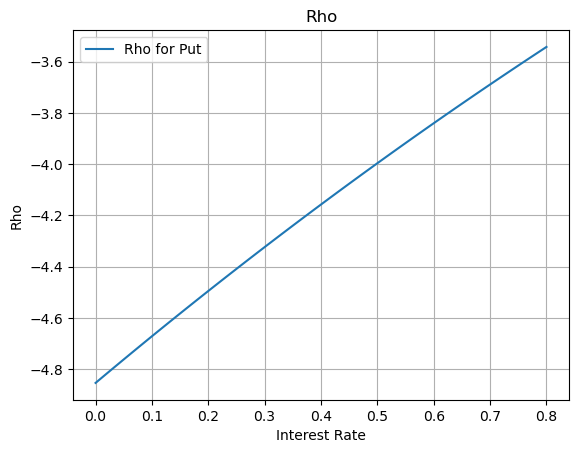

In [215]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [227]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 29, T[i], 0.035, 0, 2.065, 'put')

C:\Users\91982\AppData\Local\Temp\ipykernel_4208\2538152910.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


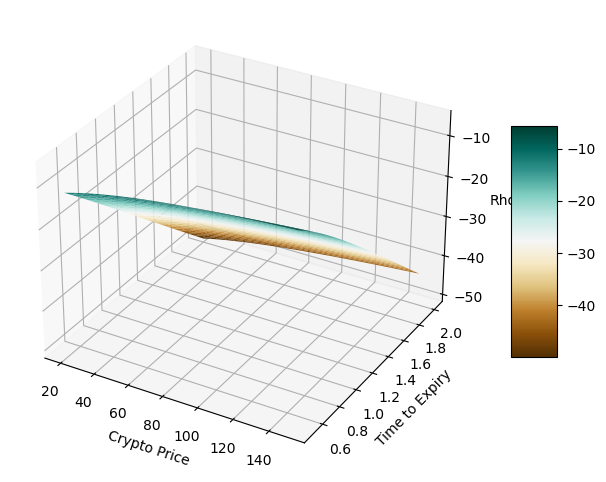

In [228]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.



In [229]:

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega


In [230]:
vega(31.42, 29, 1/4, 0.035, 0, 2.065, 'put')


5.227566300647396

In [231]:
vol = np.linspace(0.1,2,21)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(31.42, 29, 1/4, 0.035, 0, vol[i], 'put')

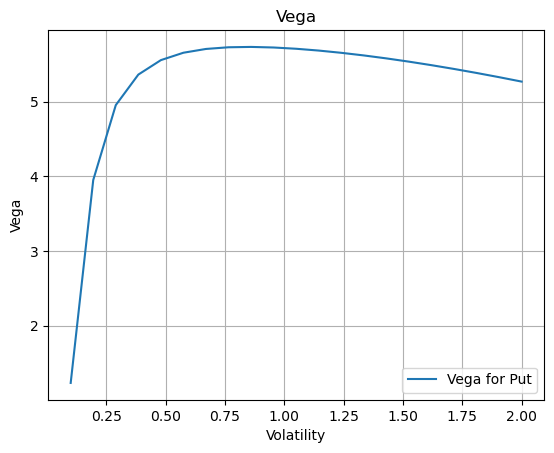

In [232]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [235]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 29, T[i], 0.035, 0, 2.065, 'put')

C:\Users\91982\AppData\Local\Temp\ipykernel_4208\3646805906.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


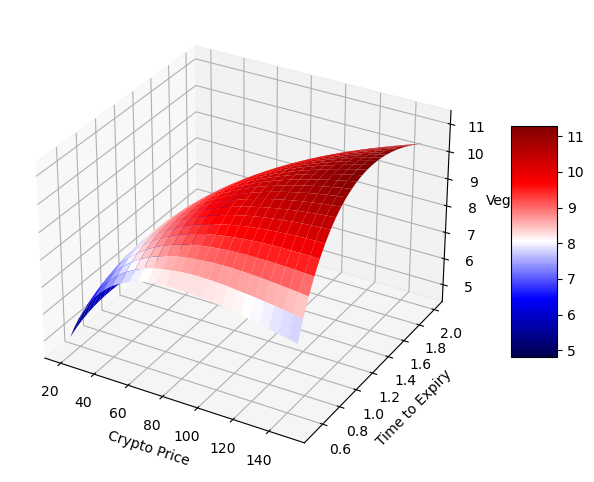

In [236]:

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.seismic, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);